In [1]:
import mushi
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [44]:
m = 10
t = np.logspace(0, 5, m)
change_points = t[:-1]
y = 1e3 * (1 + 2 * expit(100 * (t - 1e3)) + 10 * expit(-100 * (t - 1e2)))

In [45]:
eta = mushi.eta(t[:-1], y)

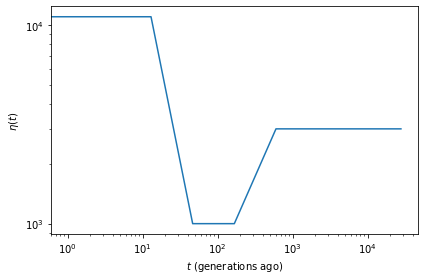

In [46]:
eta.plot();

In [49]:
n = 10
ksfs = mushi.kSFS(n=n)

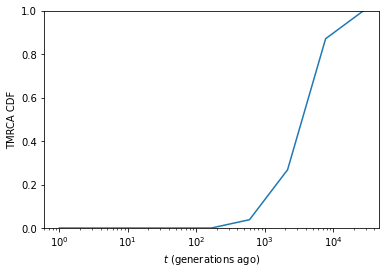

In [50]:
plt.plot(change_points, ksfs.tmrca_cdf(eta))
plt.xlabel('$t$ (generations ago)')
plt.xscale('log')
plt.ylabel('TMRCA CDF')
plt.ylim([0, 1]);

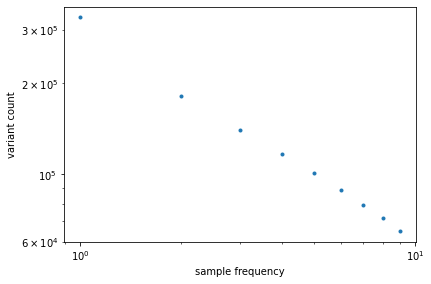

In [51]:
mu0 = 100
ksfs.simulate(eta, mu0, seed=0)

ksfs.plot_total();
plt.xscale('log')
plt.yscale('log')

In [52]:
alpha_tv_trajectory = np.logspace(2, 5, 10)
alpha_spline_trajectory = np.logspace(1, 6, 10)
residuals = np.zeros((len(alpha_tv_trajectory), len(alpha_spline_trajectory), m))
loss = np.zeros((len(alpha_tv_trajectory), len(alpha_spline_trajectory)))
etas = {}
for i, alpha_tv in enumerate(alpha_tv_trajectory):
    print(f'alpha_tv = {alpha_tv}')
    for j, alpha_spline in enumerate(alpha_spline_trajectory):
        print(f'    alpha_spline = {alpha_spline}')
        ksfs.clear_eta()
        ksfs.infer_history(change_points, mu0, max_iter=100,
                           alpha_tv=alpha_tv, alpha_spline=alpha_spline, alpha_ridge=1e-6)

        residuals[i, j, :] = np.log(ksfs.eta.y) - np.log(eta.y)
        L = mushi.utils.C(n) @ mushi.utils.M(n, *ksfs.eta.arrays())
        loss[i, j] = mushi.utils.prf(ksfs.mu.Z, ksfs.X, L)        
        etas[i, j] = ksfs.eta

alpha_tv = 100.0
    alpha_spline = 10.0
    alpha_spline = 35.938136638046274
    alpha_spline = 129.1549665014884
    alpha_spline = 464.1588833612782
    alpha_spline = 1668.100537200059
    alpha_spline = 5994.8425031894085
    alpha_spline = 21544.346900318866
    alpha_spline = 77426.36826811278
    alpha_spline = 278255.94022071257
    alpha_spline = 1000000.0
alpha_tv = 215.44346900318845
    alpha_spline = 10.0
    alpha_spline = 35.938136638046274
    alpha_spline = 129.1549665014884
    alpha_spline = 464.1588833612782
    alpha_spline = 1668.100537200059
    alpha_spline = 5994.8425031894085
    alpha_spline = 21544.346900318866
    alpha_spline = 77426.36826811278
    alpha_spline = 278255.94022071257
    alpha_spline = 1000000.0
alpha_tv = 464.15888336127773
    alpha_spline = 10.0
    alpha_spline = 35.938136638046274
    alpha_spline = 129.1549665014884
    alpha_spline = 464.1588833612782
    alpha_spline = 1668.100537200059
    alpha_spline = 5994.8425031894085
    al

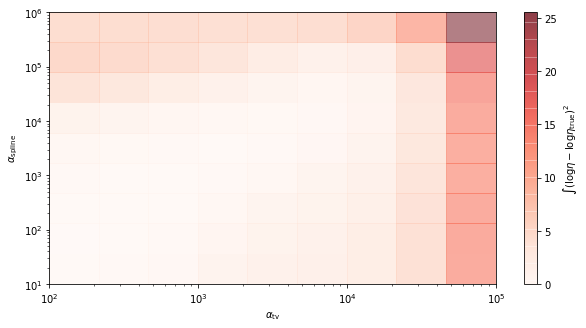

In [13]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(alpha_tv_trajectory, alpha_spline_trajectory,
               (residuals ** 2).sum(2).T,
               alpha=0.5, cmap="Reds", vmin=0)
plt.xlabel('$\\alpha_{\\rm tv}$')
plt.ylabel('$\\alpha_{\\rm spline}$')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\int\\left(\\log\\eta - \\log\\eta_{\\rm true}\\right)^2$');

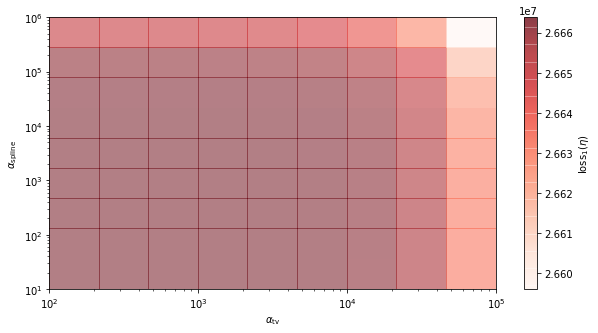

In [14]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(alpha_tv_trajectory, alpha_spline_trajectory,
               loss.T,
               alpha=0.5, cmap="Reds")
plt.xlabel('$\\alpha_{\\rm tv}$')
plt.ylabel('$\\alpha_{\\rm spline}$')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
cbar.ax.set_ylabel('${\\rm loss}_1(\\eta)$');

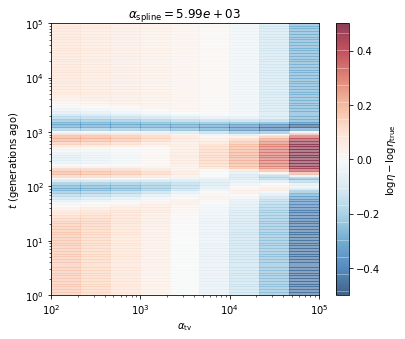

In [21]:
j_choice = 5
plt.figure(figsize=(6, 5))
plt.pcolormesh(alpha_tv_trajectory, t, residuals[:, j_choice, :].T, alpha=0.5, cmap="RdBu_r", vmin=-.5, vmax=.5)
plt.xlabel('$\\alpha_{\\rm tv}$')
plt.ylabel(f'$t$ (generations ago)')
plt.xscale('log')
plt.yscale('log')
plt.title(f'$\\alpha_{{\\rm spline}} = {alpha_spline_trajectory[j_choice]:.2e}$')
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\log\\eta - \\log\\eta_{\\rm true}$');

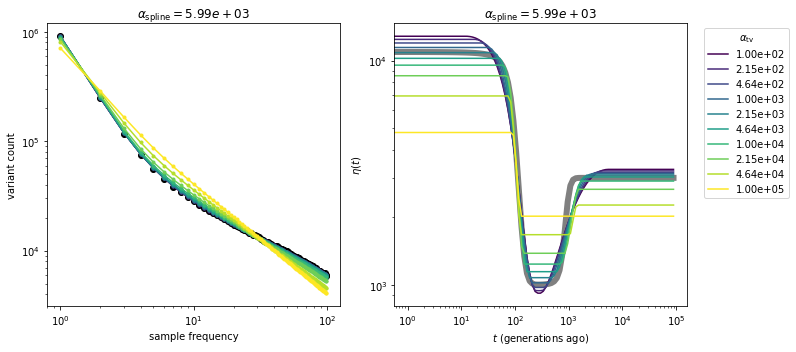

In [22]:
_, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(axes[1])
eta.plot(color='grey', lw=6)
plt.title(f'$\\alpha_{{\\rm spline}} = {alpha_spline_trajectory[j_choice]:.2e}$')
plt.sca(axes[0])
mushi.kSFS(X=ksfs.X).plot_total(kwargs=dict(color='k', ls='', marker='o'))
plt.title(f'$\\alpha_{{\\rm spline}} = {alpha_spline_trajectory[j_choice]:.2e}$')
cmap = plt.get_cmap('viridis')
for i, alpha_tv in enumerate(alpha_tv_trajectory):
    plt.sca(axes[1])
    etas[i, j_choice].plot(label=f'{alpha_tv:.2e}',
                           color=cmap(i / (len(alpha_tv_trajectory) - 1)))
    plt.sca(axes[0])
    plt.plot(range(1, n), mu0*(mushi.utils.C(n) @ mushi.utils.M(n, *etas[i, j_choice].arrays())).sum(1),
             ls='-', marker='.',
             color=cmap(i / (len(alpha_tv_trajectory) - 1)),
             label=f'{alpha_tv:.2e}')
plt.sca(axes[0])
plt.xscale('log')
plt.yscale('log')
plt.sca(axes[1])
plt.legend(title='$\\alpha_{\\rm tv}$', bbox_to_anchor=(1.04, 1), loc='upper left', ncol=1);